In [4]:
from google.colab import files
uploaded = files.upload()

Saving cctv4.JPG to cctv4.JPG


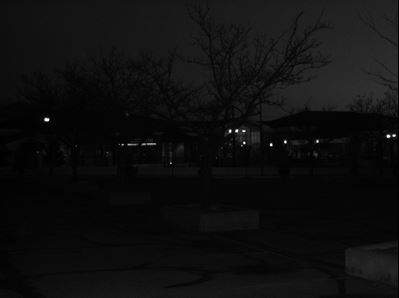

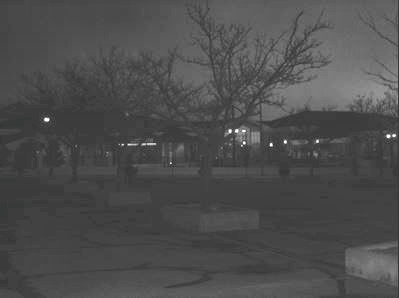

Enhanced image 1 saved successfully!


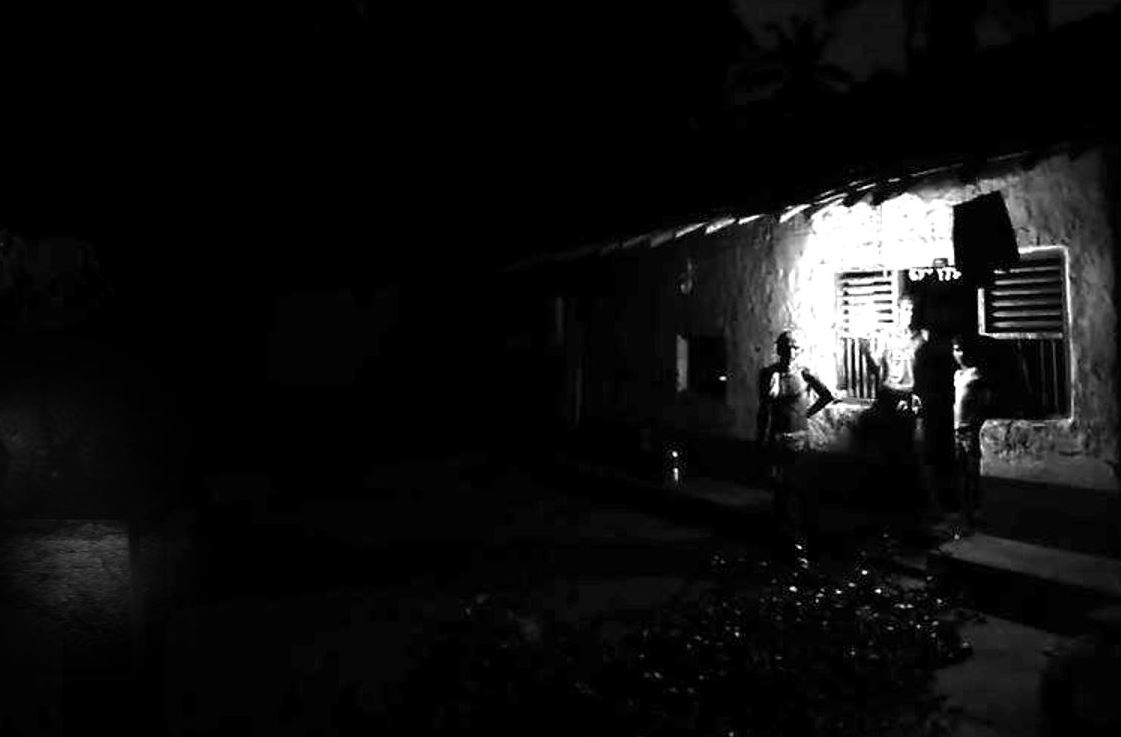

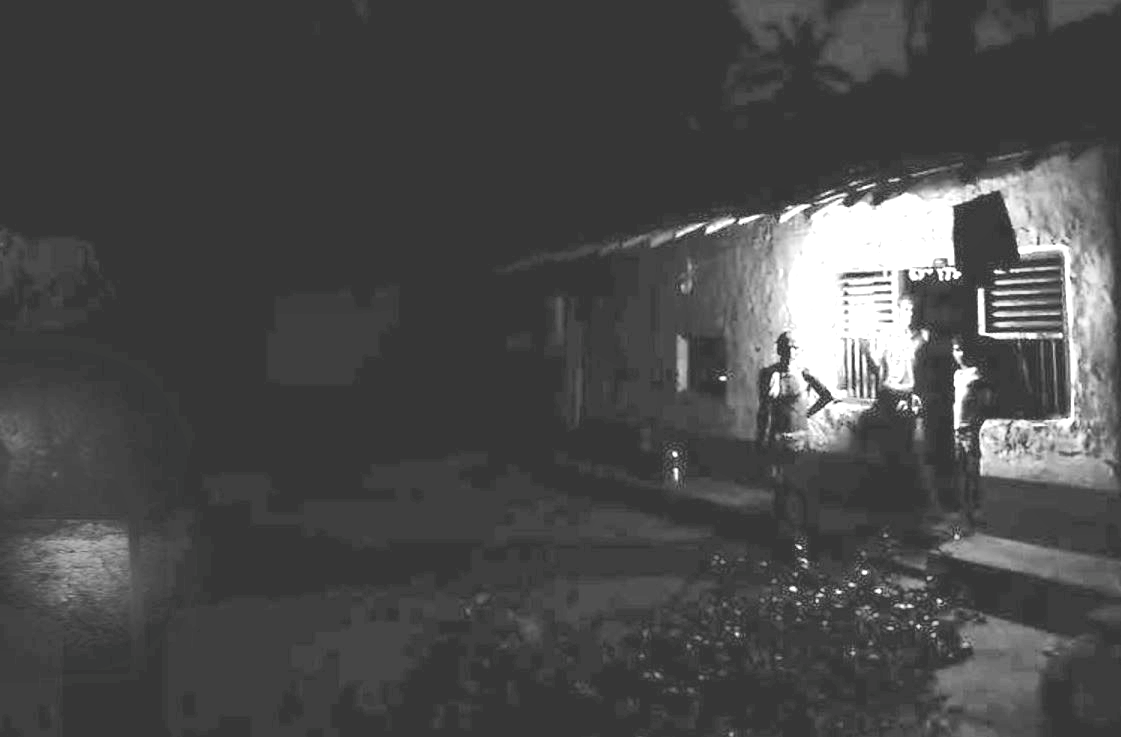

Enhanced image 2 saved successfully!


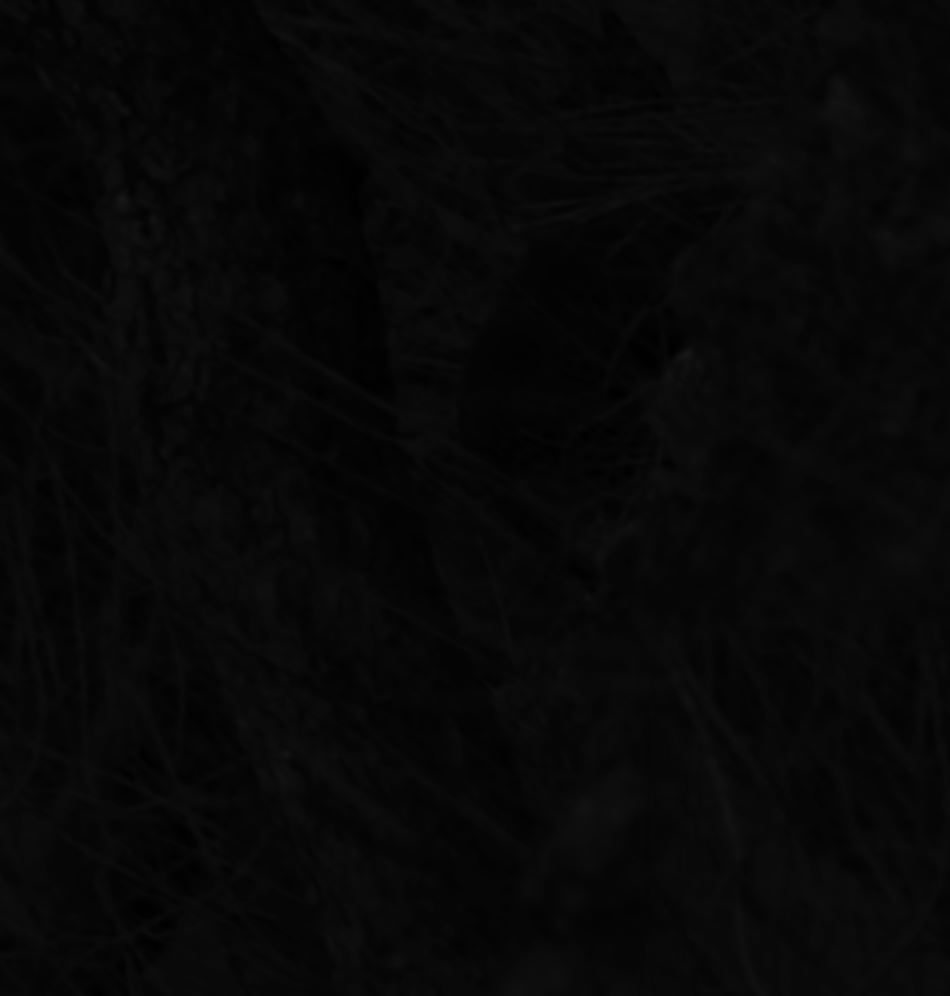

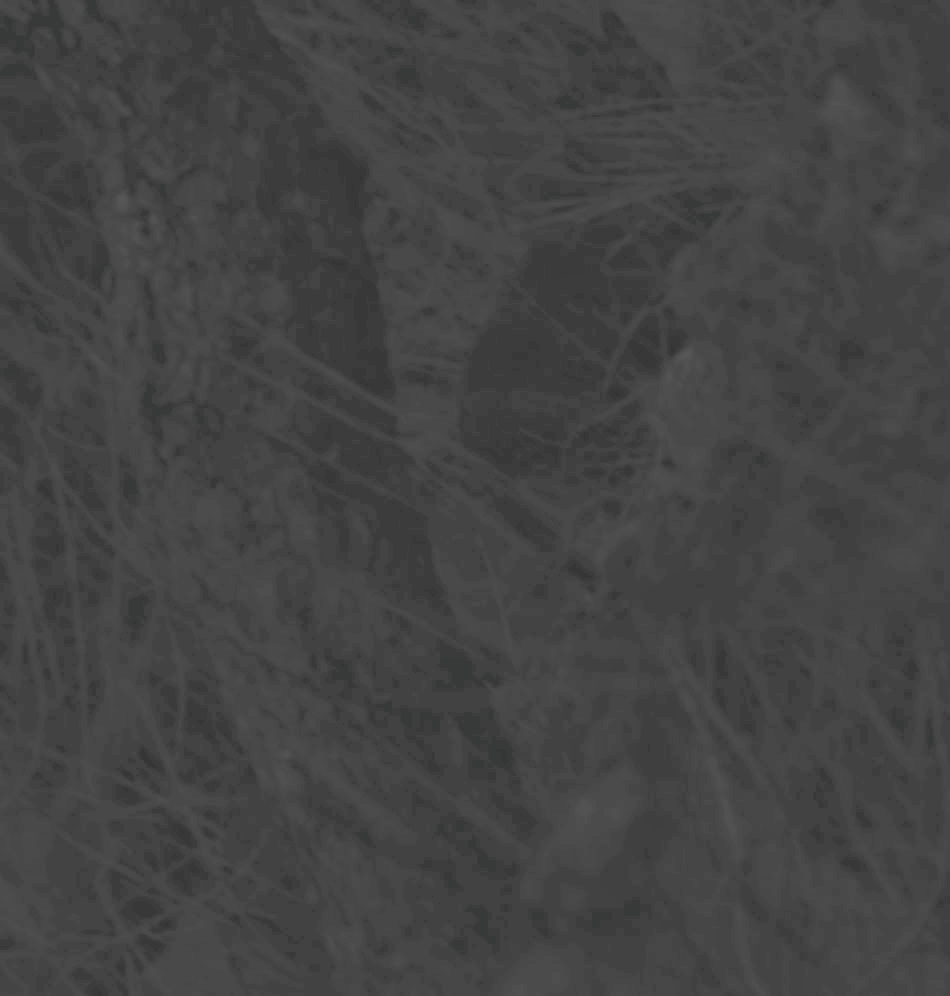

Enhanced image 3 saved successfully!


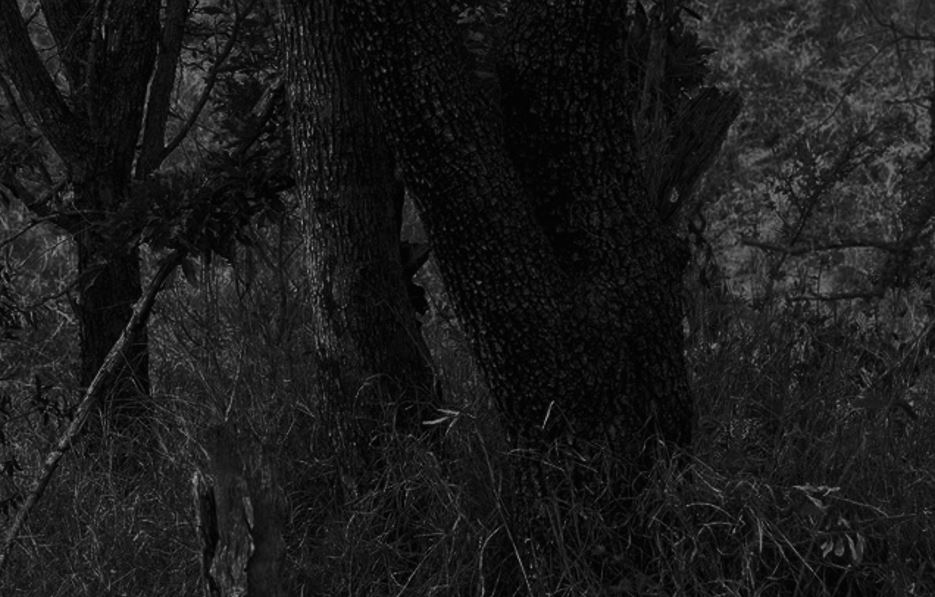

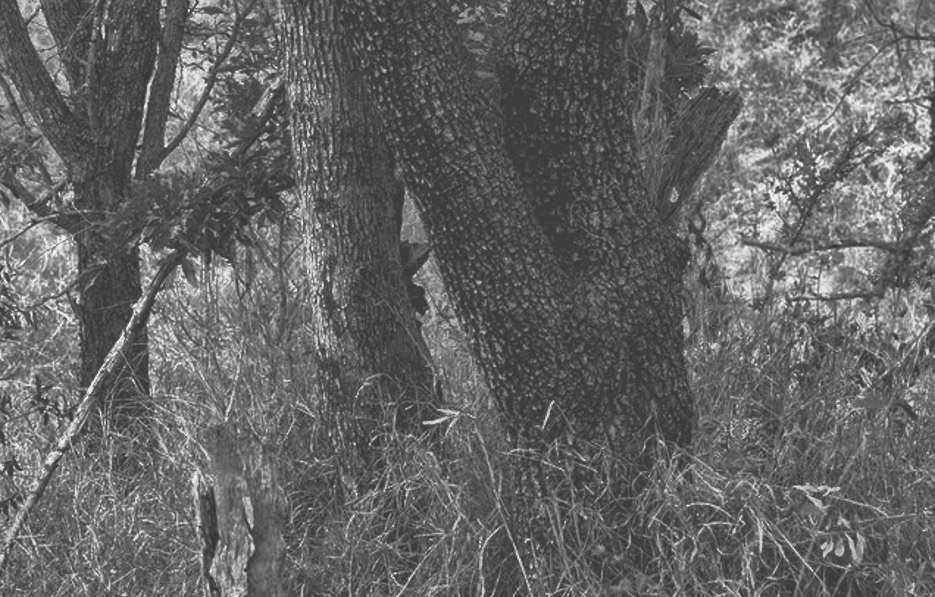

Enhanced image 4 saved successfully!


In [6]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

def enhance_image(image_path):
    image = cv2.imread(image_path)

    # Converting the image to LAB color space
    lab_image = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)

    # Splitting the LAB image into L, A, and B channels
    l_channel, a_channel, b_channel = cv2.split(lab_image)

    # Apply CLAHE to the L channel
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
    enhanced_l_channel = clahe.apply(l_channel)

    # Merging the enhanced L channel with the original A and B channels
    enhanced_lab_image = cv2.merge([enhanced_l_channel, a_channel, b_channel])

    # Converting the enhanced LAB image back to BGR color space
    enhanced_bgr_image = cv2.cvtColor(enhanced_lab_image, cv2.COLOR_LAB2BGR)

    # Increasing the brightness
    enhanced_bgr_image = cv2.convertScaleAbs(enhanced_bgr_image, alpha=1.0, beta=50)

    return enhanced_bgr_image

if __name__ == "__main__":
    for i in range(1, 5):
        image_path = f"cctv{i}.JPG"

        # Display the original image
        original_image = cv2.imread(image_path)
        cv2_imshow(original_image)

        # Enhance the image
        enhanced_image = enhance_image(image_path)

        # Display the enhanced image
        cv2_imshow(enhanced_image)

        # Save the enhanced image
        cv2.imwrite(f"enhanced-cctv{i}.jpg", enhanced_image)
        print(f"Enhanced image {i} saved successfully!")
